# Correlation between entropy/FD metrics

https://stochastic.readthedocs.io/en/stable/noise.html#stochastic.processes.noise.ColoredNoise

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import antropy as ant
import matplotlib.pyplot as plt
import stochastic.processes.noise as sn
sns.set(font_scale=1.25)

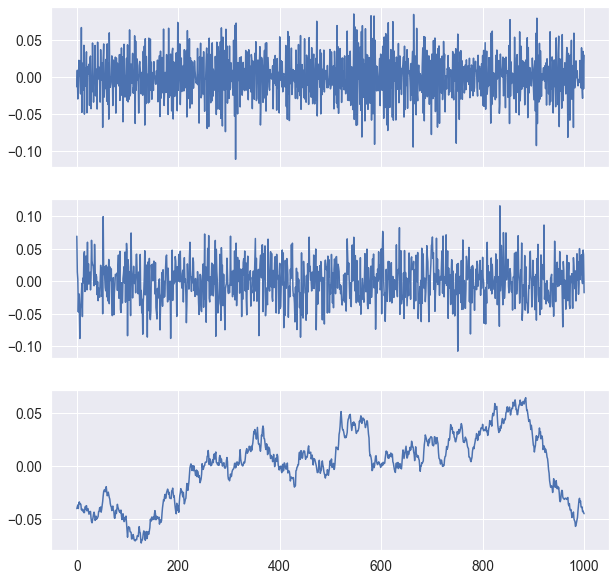

In [2]:
# Generate time-series with increasing B exponent
betas = np.arange(-2, 2.1, 0.1)
n_ts = betas.size
n_samples = 1000
sf = 10
ts = np.empty((n_ts, n_samples + 1))

for i, b in enumerate(betas):
    rng = np.random.default_rng(42)
    ts[i] = sn.ColoredNoise(beta=b, rng=rng).sample(n_samples)
    
# Plot the first, center and last time-series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
ax1.plot(ts[0])  # Violet noise
ax2.plot(ts[int(n_ts / 2)])  # White noise
ax3.plot(ts[-1]);  # Brownian noise

In [3]:
# Compute the entropy metrics
df = pd.DataFrame()

for i in range(n_ts):
    df = df.append({
        'PermEnt': ant.perm_entropy(ts[i], order=3, normalize=True),
        'SVDEnt' : ant.svd_entropy(ts[i], order=3, normalize=True),
        'SpecEnt' : ant.spectral_entropy(ts[i], sf, normalize=True, 
                                         method='welch', nperseg=50),
        'AppEnt': ant.app_entropy(ts[i], order=2),
        'SampleEnt': ant.sample_entropy(ts[i], order=2),
        'PetrosianFD': ant.petrosian_fd(ts[i]),
        'KatzFD': ant.katz_fd(ts[i]),
        'HiguchiFD': ant.higuchi_fd(ts[i]),
        'DFA': ant.detrended_fluctuation(ts[i])}, ignore_index=True)

df.head().round(3)

,AppEnt,DFA,HiguchiFD,KatzFD,PermEnt,PetrosianFD,SVDEnt,SampleEnt,SpecEnt
0,1.574,0.067,2.061,8.913,0.986,1.040,0.921,1.893,0.866
1,1.606,0.084,2.065,5.770,0.986,1.040,0.925,1.911,0.871
2,1.579,0.080,2.062,6.690,0.988,1.040,0.934,1.932,0.881
3,1.588,0.094,2.066,6.784,0.990,1.040,0.940,1.971,0.890
4,1.635,0.103,2.067,6.712,0.995,1.038,0.941,1.993,0.897


In [4]:
# Describe
df.agg(['min', 'median', 'max']).round(2).T

,min,median,max
AppEnt,0.41,1.62,1.70
DFA,0.07,0.53,1.49
HiguchiFD,1.47,2.00,2.07
KatzFD,1.94,5.33,8.91
PermEnt,0.95,1.00,1.00
PetrosianFD,1.03,1.04,1.04
SVDEnt,0.35,0.95,1.00
SampleEnt,0.37,2.02,2.23
SpecEnt,0.48,0.90,0.99


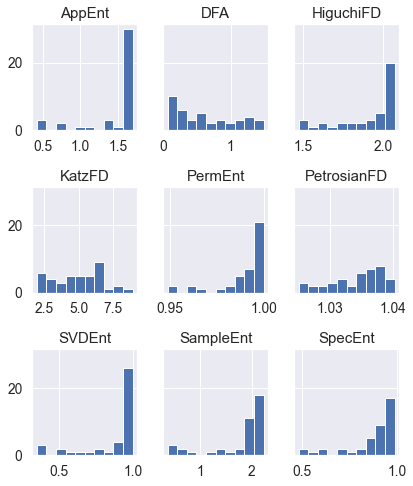

In [5]:
# Distribution
df.hist(figsize=(6, 7), layout=(3, 3), sharey=True)
plt.tight_layout()

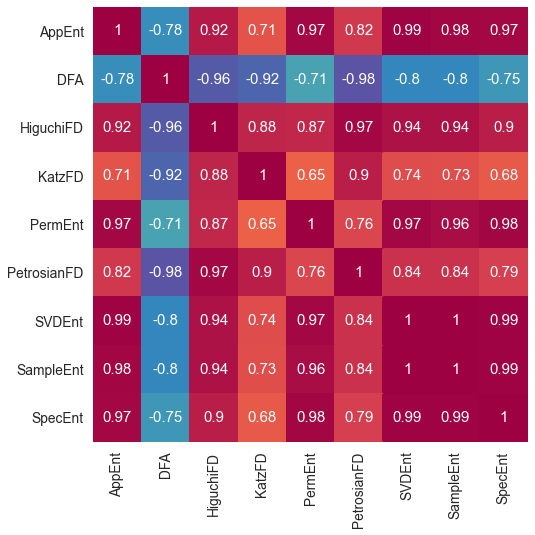

In [6]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cbar=False, 
            cmap='Spectral_r', square=True);

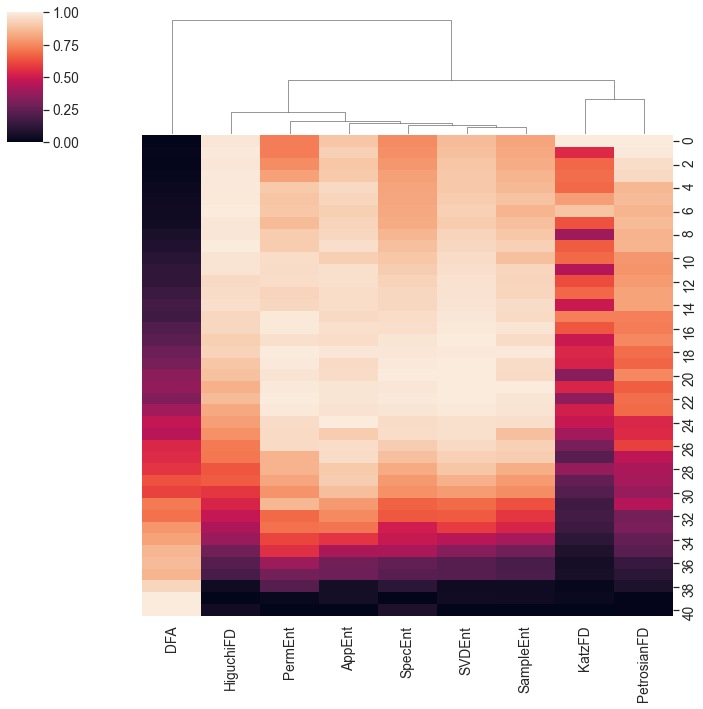

In [7]:
sns.clustermap(df.interpolate(), row_cluster=False, standard_scale=1);